# **MNIST Dataset**

# **Settings**

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.optim.adam import Adam

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

# **1. 데이터 불러오기**

In [2]:
# 데이터 불러오기
train_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 106790038.18it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17946028.71it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25384820.98it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17366024.40it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
print(f'train_data = {train_data.data.size()}   train_target = {train_data.targets.size()}')

train_data = torch.Size([60000, 28, 28])   train_target = torch.Size([60000])


[Text(0.5, 1.0, 'tensor(5)')]

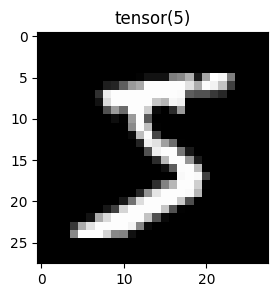

In [4]:
fig, ax = plt.subplots(figsize=(3,3))

ax.imshow(train_data.data[0], cmap='gray')
ax.set(title=train_data.targets[0])

In [5]:
# data loader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## **2. 모델 설정**



In [6]:
# gpu 쓸 수 있는지 check
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [9]:
# 모델 생성
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

In [10]:
# 모델을 gpu로 보내자.
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
next(model.parameters()).get_device()       # cpu이면 -1 gpu이면 0

0

# **3. 모델 학습**

In [18]:
optim = Adam(model.parameters(), lr=1e-3)
epochs = 20

for epoch in range(epochs):
    for data, label in train_loader:
        optim.zero_grad()                                           # 초기화
        data = torch.reshape(data, (-1,28*28))                      # 데이터 한 줄로
        pred = model(data.to(device))                               # data gpu로 보내기
        loss = nn.CrossEntropyLoss()(pred, label.to(device))        # loss function
        loss.backward()                                             # 가중치 역전파(gradient 계산)
        optim.step()                                                # 최적화

    print(f'epoch = {epoch}, loss = {loss.item()}')


epoch = 0, loss = 0.06890061497688293
epoch = 1, loss = 0.044072892516851425
epoch = 2, loss = 0.005699128843843937
epoch = 3, loss = 0.05811776593327522
epoch = 4, loss = 0.017366768792271614
epoch = 5, loss = 0.00692445132881403
epoch = 6, loss = 0.028057772666215897
epoch = 7, loss = 0.0002540693385526538
epoch = 8, loss = 0.0001947971322806552
epoch = 9, loss = 0.026447487995028496
epoch = 10, loss = 0.017783692106604576
epoch = 11, loss = 0.0008048725430853665
epoch = 12, loss = 0.0006594292353838682
epoch = 13, loss = 9.010652138385922e-05
epoch = 14, loss = 0.00048610829981043935
epoch = 15, loss = 1.3573869182437193e-05
epoch = 16, loss = 0.008171144872903824
epoch = 17, loss = 0.2506541907787323
epoch = 18, loss = 5.0970287702511996e-05
epoch = 19, loss = 0.0012316827196627855


In [ ]:
model.eval()                # 모델에서 필요없는 레이어를 사용하지 않도록 off 시킨다.(ex. Dropout, Batch Normalization)
model.train()               # eval과 반대개념.

In [28]:
model.eval()

total_corr = 0
with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 28*28)).to(device)
        output = model(data)
        preds = output.data.max(1)[1]

        corr = preds.eq(label.to(device)).sum().item()
        total_corr += corr
        print(corr, end=' ')

    print()
    print(total_corr / len(test_data))

31 32 31 31 30 32 31 31 32 32 30 31 32 31 31 32 32 31 31 31 31 32 30 32 32 32 31 30 32 29 32 31 31 32 31 31 31 32 27 31 31 29 32 30 32 30 31 29 29 32 31 32 31 32 29 30 32 30 31 31 31 31 32 29 32 30 30 32 30 31 31 30 31 32 30 31 29 32 32 32 31 30 29 32 32 31 32 32 32 31 31 29 30 29 31 30 31 31 32 32 31 32 32 32 32 31 30 32 31 31 31 29 30 32 32 32 32 30 30 30 31 31 31 29 29 31 32 30 31 30 30 31 32 32 29 32 31 32 29 32 29 31 31 32 32 32 32 31 30 32 30 30 30 32 32 30 32 32 29 32 32 32 31 32 32 32 31 32 32 32 32 32 32 32 32 32 31 31 31 30 32 32 31 32 31 30 29 31 31 31 32 32 31 32 32 32 32 32 32 32 32 32 32 32 29 30 31 28 32 32 31 30 32 32 32 32 32 32 32 32 32 32 32 32 32 31 32 32 32 32 32 31 31 32 32 32 31 32 32 32 32 32 32 32 32 30 31 29 31 32 32 31 31 32 32 32 32 32 31 32 31 32 32 31 32 32 30 32 32 32 32 32 32 32 32 32 32 32 32 32 32 29 31 32 32 32 32 32 32 31 31 32 32 32 32 32 32 32 31 31 31 31 30 30 30 30 30 31 31 31 31 31 16 
0.9759


In [24]:
test = torch.tensor([[1,2,3],[1,3,2]])
print(test)

tensor([[1, 2, 3],
        [1, 3, 2]])


In [27]:
test.max(1)[1]

tensor([2, 1])

In [29]:
# 모델 저장
torch.save(model, 'model.pth')

# 모델 불러오기
new_model = torch.load('model.pth')

In [30]:
new_model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)